<a href="https://colab.research.google.com/github/Theimm0rTL/19CSE464_Activity_1/blob/main/Final_proj_ipnyb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
#1st block
#Importing all the required libraries 


from email.message import Message
import smtplib 
import email
import base64
from email import encoders
from email.mime.text import MIMEText
from email.mime.base import MIMEBase
from email.mime.multipart import MIMEMultipart
from email import utils, encoders
import pandas as pd
!git clone https://github.com/misbah4064/face_recognition.git
%cd face_recognition
###############
!pip install face_recognition
###########
from google.colab import drive
drive.mount('/content/drive')
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

Cloning into 'face_recognition'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 26 (delta 5), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (26/26), done.
/content/face_recognition/face_recognition/face_recognition
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
#2nd block
#camera ON
file_i= take_photo()
 

<IPython.core.display.Javascript object>

# **Training Images**

In [38]:
#3rd block
#training the algo

import face_recognition
import numpy as np
from PIL import Image, ImageDraw
from IPython.display import display
from google.colab.patches import cv2_imshow
import cv2
from datetime import datetime

face_1 = face_recognition.load_image_file("/content/sample_data/Lokesh_photo.jpg")
face_1_encoding = face_recognition.face_encodings(face_1)[0]

face_2 = face_recognition.load_image_file("/content/sample_data/WhatsApp.jpeg")
face_2_encoding = face_recognition.face_encodings(face_2)[0]

face_3 = face_recognition.load_image_file("/content/sample_data/DSC_0012 copy.jpg")
face_3_encoding = face_recognition.face_encodings(face_3)[0]

known_face_encodings = [
    face_1_encoding,
    face_2_encoding,
    face_3_encoding
]
known_face_names = [
    "lokesh",
    "koti",
    "kshitiz"
]
print("Done learning and creating profiles")
def makeAttendanceEntry(name):
    with open('attendance_list.csv','r+') as FILE:
        allLines = FILE.readlines()
        attendanceList = []
        for line in allLines:
            entry = line.split(',')
            attendanceList.append(entry[0])
        if name not in attendanceList:
            now = datetime.now()
            dtString = now.strftime('%d/%b/%Y, %H:%M:%S')
            FILE.writelines(f'\n{name},{dtString}')

Done learning and creating profiles


# **Initializing function to add names to the "attendance_list.csv" file**

# **Performing Face Recognition and Entering Attendance with time-stamp**

kshitiz


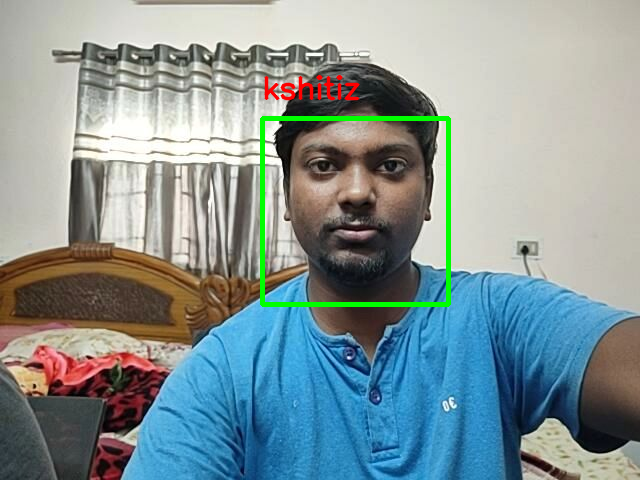

kshitiz


In [39]:
#4th block
#testing the algo

file_name= file_i

unknown_image = face_recognition.load_image_file(file_name)
unknown_image_to_draw = cv2.imread(file_name)

face_locations = face_recognition.face_locations(unknown_image)
face_encodings = face_recognition.face_encodings(unknown_image, face_locations)

pil_image = Image.fromarray(unknown_image)
draw = ImageDraw.Draw(pil_image)

for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
    # See if the face is a match for the known face(s)
    matches = face_recognition.compare_faces(known_face_encodings, face_encoding)

    name = "Unknown"

    face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
    best_match_index = np.argmin(face_distances)
    if matches[best_match_index]:
        name = known_face_names[best_match_index]

    # Draw a box around the face using the Pillow module
    cv2.rectangle(unknown_image_to_draw,(left, top), (right, bottom), (0,255,0),3 )
    draw.rectangle(((left, top), (right, bottom)), outline=(0, 255, 255))
    cv2.putText(unknown_image_to_draw,name,(left,top-20), cv2.FONT_HERSHEY_SIMPLEX,1, (0,0,255), 2,cv2.LINE_AA)
    print(name)
    makeAttendanceEntry(name)

# display(pil_image)
cv2_imshow(unknown_image_to_draw)
print(name)

In [40]:
#5th block
#reading the attendance file


if name=="Unknown":
  print('Student not registered.\nPlease register the student and try again.')
else:
  data= pd.read_excel('/content/sample_data/koti.xlsx')
  data_in=name
 
  list_a=data.index[data['Name']==data_in].tolist()
  nm=list_a[0]
  dt=str(data.iloc[nm])
   

  msgg=''
  msgg=msgg+dt
  
  ############################################
  a=str(data.loc[data['Name']==name,   ['Email' ]  ])
 
  flag=0
  b=' '
  for i in range(len(a)):
    if a[i].isdigit() and a[i+1]==' ':
      flag=flag+1
      j=i
      break
  c=" "
  for i in range(j+1,len(a)):
    c=c+a[i]
  
  ###################################
  
#Sending th email
#Creating a server

  server= smtplib.SMTP('smtp.gmail.com',587)

  #starting the server
  server.ehlo()
  server.starttls()
  print("Server started.")

  #Enter Credentials
  Sender_email='bandilokesh53@gmail.com'
  password='Loke$h123'
  Receiver_email=c

  #Server Login
  server.login(Sender_email, password)

  #Headers
  msg = MIMEMultipart()

  msg['From'] = Sender_email
  msg['To'] = Receiver_email
  msg['Subject'] = 'Report'
  msg['Date'] = utils.formatdate(localtime = 1)
  msg['Message-ID'] = utils.make_msgid()

  #Getting the Body/message of the e-mail
  message=input('Enter the message')
  message= message+'\n'+dt



  msg.attach(MIMEText(message, 'plain'))


  #Sending the E-mail
  text = msg.as_string()    
  server.sendmail(Sender_email,Receiver_email,text)

  print(msg.as_string())
  print('Your Mail has been successfully sent :)')

  server.quit()



Server started.
Enter the messageHelloo 
Content-Type: multipart/mixed; boundary="===============0210374538243912146=="
MIME-Version: 1.0
From: bandilokesh53@gmail.com
To:    adarshsinghoffc2000@gmail.com
Subject: Report
Date: Fri, 15 Apr 2022 11:31:26 +0000
Message-ID: <165002228616.71.2074738984084293919@c76ed20b4289>

--===============0210374538243912146==
Content-Type: text/plain; charset="us-ascii"
MIME-Version: 1.0
Content-Transfer-Encoding: 7bit

Helloo 
Name                                                                           kshitiz
roll_num                                                                     180801112
gender                                                                            male
cognitive radio-Total no.of days                                                    50
cognitive radio-No. of days attended                                                37
cognitive radio-Attendance percentage                                             74.0
human values